# Taft Plot Investigations

This workbook contains the code and imports the data to explore how Taft used acid and base-catalyzed ester hydrolysis to develope the taft steric and electronic parameters.

## Plot $pK_a$ vs $\sigma^*$

Plot $pK_a$ vs $\sigma^*$ to confirm that Taft $\sigma^*$ values track with Hammett $\sigma$ values. The slope should be near one if the substituent parameters were scaled propertly (recall that taft used the Hammett $\rho$ value of 2.3 when setting his $\sigma^*$ values).

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_17/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

sigmatype = "s_plus"    # change to "sigma", "s_plus", or "s_minus"


###################################################################
### a function to fill in sigma for empty spaces in s+ and s-   ###
###################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#LFER_file = "LFER_HanschLeoTaft.csv"
LFER_file = "LFER_Williams.csv"

data_set = pd.read_csv(github_location_LFER_tables + LFER_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent",   
                 comment = "#") 


########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set=fill_sigma(data_set)

### Remove unneeded columns
if LFER_file == "LFER_HanschLeoTaft.csv":
    data_set.drop(labels = ["TABLE V", "TABLE I"],      #Trim "LFER_HanschLeoTaft.csv" data
    axis = 1,
    inplace = True)
elif LFER_file == "LFER_Williams.csv":
    data_set.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
    axis = 1,
    inplace = True)
else:
    print("ERROR: No filename")
print(data_set)

################################################################################
### Read table 1 data. The fields are separated by commas; comments are enabled  ###
################################################################################

data_file = "17-Table_4.csv"

table_data_df = pd.read_csv(github_location + data_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent",    # Cant use Substituent as index - duplicate entries in data series
                 comment = "#") 

### Join the two dataframes according to the index column (Substituent)
#df = pd.concat([table_data_df, data_set], axis=1, join="inner")

#df.sort_values(by=[sigmatype], inplace=True)    # sort according to sigma so we can pick the left-most and right-most points more easily

#df["logk"] = np.log10(df["k"])


print(table_data_df)

             sigma  s_plus  s_minus
Substituent                        
m-Br          0.39    0.39     0.39
p-Br          0.23    0.15     0.25
m-C6H5        0.06    0.06     0.06
p-C6H5       -0.01    0.02    -0.18
m-CCCH3       0.10    0.10     0.10
...            ...     ...      ...
o-CH3         0.29    0.29     0.29
o-Cl          1.26    1.26     1.26
o-NO2         2.03    2.03     2.03
o-Br          1.35    1.35     1.35
o-I           1.34    1.34     1.34

[67 rows x 3 columns]
    Formula  pKa_COOH  pKa_CH2OH Substituent  Number_of_substituents
0       CH3      4.76      16.00           H                     1.0
1     CH2Cl      2.86      14.31        m-Cl                     1.0
2     CH2Br      2.86        NaN        m-Br                     1.0
3     CHCl2      1.29      12.89        m-Cl                     2.0
4      CCl3      0.65      12.24        m-Cl                     3.0
5      CBr3      0.66        NaN        m-Br                     3.0
6       CF3      0.00     

In [63]:
##########################################################################
### A little program to copy in the sigma values for each substituent. ###
### Perhaps someday I will make it a proper function for general use.  ###
##########################################################################

# We are doing this because the substituent column contains double entries for many substituents and cannot be used as an index column.

table_data_df.dropna(subset = "Substituent", inplace = True)  # One of the substituents in this dataframe has no value. Drop that row.


table_data_df["sigma"] = np.NaN     # Create new columns in the dataframe to reference
table_data_df["s_plus"] = np.NaN
table_data_df["s_minus"] = np.NaN

for x in table_data_df.index:
    substituent_name = table_data_df["Substituent"][x]   # Get the name of the substituent in row x
#    print(substituent_name)
    sigma_series = data_set.loc[substituent_name]    # get the set of sigma values from the Hammett data
    table_data_df["sigma"][x] = sigma_series["sigma"]    # insert the Hammett parameters 
    table_data_df["s_plus"][x] = sigma_series["s_plus"]
    table_data_df["s_minus"][x] = sigma_series["s_minus"]
    
#########################################################################
### Perform calculations on columns and add new columns with results  ###
#########################################################################

display(table_data_df)

/var/folders/_0/pb9y62rd59n_3vs7rbl1bndm0000gn/T/ipykernel_28831/3890691663.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data_df["sigma"][x] = sigma_series["sigma"]    # insert the Hammett parameters
/var/folders/_0/pb9y62rd59n_3vs7rbl1bndm0000gn/T/ipykernel_28831/3890691663.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_data_df["s_plus"][x] = sigma_series["s_plus"]
/var/folders/_0/pb9y62rd59n_3vs7rbl1bndm0000gn/T/ipykernel_28831/3890691663.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

,Formula,pKa_COOH,pKa_CH2OH,Substituent,Number_of_substituents,sigma,s_plus,s_minus
0,CH3,4.76,16.00,H,1.0,0.00,0.00,0.00
1,CH2Cl,2.86,14.31,m-Cl,1.0,0.37,0.37,0.37
2,CH2Br,2.86,NaN,m-Br,1.0,0.39,0.39,0.39
3,CHCl2,1.29,12.89,m-Cl,2.0,0.37,0.37,0.37
4,CCl3,0.65,12.24,m-Cl,3.0,0.37,0.37,0.37
5,CBr3,0.66,NaN,m-Br,3.0,0.39,0.39,0.39
6,CF3,0.00,12.37,m-F,3.0,0.34,0.34,0.34
7,CH2F,2.66,NaN,m-F,1.0,0.34,0.34,0.34
8,C6H5,4.31,15.40,m-C6H5,1.0,0.06,0.06,0.06
9,CH2CN,2.43,NaN,m-CN,1.0,0.56,0.56,0.56


In [64]:
### Multiply sigmas for multiple substituents.

table_data_df["sigma"] = table_data_df["sigma"]*table_data_df["Number_of_substituents"]
table_data_df

,Formula,pKa_COOH,pKa_CH2OH,Substituent,Number_of_substituents,sigma,s_plus,s_minus
0,CH3,4.76,16.00,H,1.0,0.00,0.00,0.00
1,CH2Cl,2.86,14.31,m-Cl,1.0,0.37,0.37,0.37
2,CH2Br,2.86,NaN,m-Br,1.0,0.39,0.39,0.39
3,CHCl2,1.29,12.89,m-Cl,2.0,0.74,0.37,0.37
4,CCl3,0.65,12.24,m-Cl,3.0,1.11,0.37,0.37
5,CBr3,0.66,NaN,m-Br,3.0,1.17,0.39,0.39
6,CF3,0.00,12.37,m-F,3.0,1.02,0.34,0.34
7,CH2F,2.66,NaN,m-F,1.0,0.34,0.34,0.34
8,C6H5,4.31,15.40,m-C6H5,1.0,0.06,0.06,0.06
9,CH2CN,2.43,NaN,m-CN,1.0,0.56,0.56,0.56


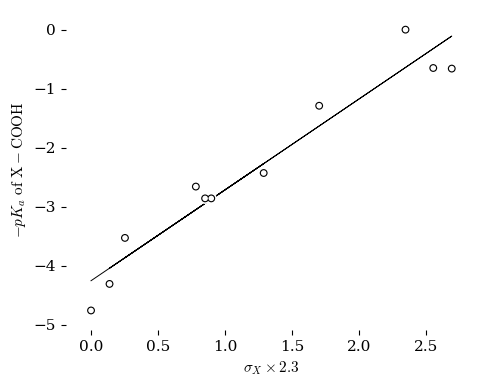

Acid Series (open circles)
slope  = 1.5
intercept = -4.256
RSQ = 0.935
LinregressResult(slope=1.540993631135689, intercept=-4.255905001269358, rvalue=0.9669646632999931, pvalue=1.2082271376084623e-06, stderr=0.13541183807884294, intercept_stderr=0.20835246054881712)


In [65]:

#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

y = -table_data_df["pKa_COOH"]
x =  table_data_df["sigma"]*2.3

from scipy.stats import linregress
import matplotlib

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################

#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=32, color="black",  edgecolors = "none", zorder=2)
ax.scatter(x,y, s=16, color="white",  edgecolors = "none", alpha = 1, zorder=2)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fit = linfit.slope * x + linfit.intercept
    ax.plot(x, fit, color='black', zorder=1, linewidth=0.7)
    



############################
### Set labels and scale ###
############################

ax.set(
#    title="Hammett Plot",       
          ylabel=r"$-pK_a \rm~of~X-COOH$", 
          xlabel=r"$\sigma_X \times 2.3$",                
#          xlim=[-.9,.9],                  
#          ylim=[-6,-1]
         )



if False:    # Flag to run or not. True = run this section, False = skip it
    for name,x_place,y_place in zip(list(df.index),x,y):
        plt.annotate(name, # this is the text
                    (x_place,y_place), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(30,0), # distance from text to points (x,y)
                    ha='left') # horizontal alignment can be left, right or center




fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

#make_axes_area_auto_adjustable(ax)
#####################################
### Print the line fit parameters ###
#####################################
print("Acid Series (open circles)")
print(f"slope  = {linfit.slope:0.1f}")
print(f"intercept = {linfit.intercept:0.3f}")
print(f"RSQ = {(linfit.rvalue**2):0.3f}")
print(linfit)

